In [1]:
import pandas as pd
import itertools
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

## generate data

In [2]:
df_all = pd.read_csv('Data/all_data.csv', header=None)
df_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,SubstrateInitConc0.2 M,0.179800,0.179200,0.17985,SubstrateInitConc0.2 M,0.17800,0.17999,0.17998,SubstrateInitConc0.2 M,0.18015,0.18084,0.18036,SubstrateInitConc0.2 M,0.17992,0.17883,0.17949,SubstrateInitConc0.2 M,0.18053,0.18035,0.17941
1,CatConc0.001 M,0.177160,0.177960,0.17872,CatConc0.002 M,0.17709,0.17866,0.17796,CatConc0.003 M,0.17700,0.17901,0.17806,CatConc0.004 M,0.17917,0.17639,0.17713,CatConc0.005 M,0.17606,0.17905,0.17585
2,NaN,0.175530,0.174990,0.17711,NaN,0.17534,0.17760,0.17699,NaN,0.17690,0.17756,0.17671,NaN,0.17662,0.17286,0.17590,NaN,0.17442,0.17675,0.17426
3,NaN,0.172970,0.171740,0.17761,NaN,0.17342,0.17609,0.17474,NaN,0.17377,0.17518,0.17422,NaN,0.17329,0.17058,0.17273,NaN,0.17149,0.17362,0.17152
4,NaN,0.171390,0.167570,0.17252,NaN,0.17239,0.17423,0.17363,NaN,0.17161,0.17404,0.17348,NaN,0.17340,0.16775,0.17178,NaN,0.16800,0.17002,0.16889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,NaN,0.000241,-0.001600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,0.001410,-0.000980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,0.000287,-0.001060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,0.000380,-0.001600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
S_001_1 = df_all[1]
S_001_1.name = 'S_001_1'
S_001_2 = df_all[2]
S_001_2.name = 'S_001_2'
S_001_3 = df_all[3]
S_001_3.name = 'S_001_3'

S_002_1 = df_all[5]
S_002_1.name = 'S_002_1'
S_002_2 = df_all[6]
S_002_2.name = 'S_002_2'
S_002_3 = df_all[7]
S_002_3.name = 'S_002_3'

S_003_1 = df_all[9]
S_003_1.name = 'S_003_1'
S_003_2 = df_all[10]
S_003_2.name = 'S_003_2'
S_003_3 = df_all[11]
S_003_3.name = 'S_003_3'

S_004_1 = df_all[13]
S_004_1.name = 'S_004_1'
S_004_2 = df_all[14]
S_004_2.name = 'S_004_2'
S_004_3 = df_all[15]
S_004_3.name = 'S_004_3'

S_005_1 = df_all[17]
S_005_1.name = 'S_005_1'
S_005_2 = df_all[18]
S_005_2.name = 'S_005_2'
S_005_3 = df_all[19]
S_005_3.name = 'S_005_3'

In [ ]:
S_001 = [S_001_1, S_001_2, S_001_3]
S_002 = [S_002_1, S_002_2, S_002_3]
S_003 = [S_003_1, S_003_2, S_003_3]
S_004 = [S_004_1, S_004_2, S_004_3]
S_005 = [S_005_1, S_005_2, S_005_3]

S_list = [S_001, S_002, S_003, S_004, S_005]

s_group_conceptual_names = {
    id(S_001): "S_001_group",
    id(S_002): "S_002_group",
    id(S_003): "S_003_group",
    id(S_004): "S_004_group",
    id(S_005): "S_005_group",
}

# --- Step 2: Combine Series Groups ---
# Select all combinations of 3 Series groups from S_list
combinations_of_3_lists = list(itertools.combinations(S_list, 3))

print(f"There are a total of {len(combinations_of_3_lists)} combinations of three Series groups (5C3).")
print("=" * 70)


In [ ]:
all_resulting_dataframes = [] # Used to store all generated DataFrames

for i, group_combination_tuple in enumerate(combinations_of_3_lists):
    
    # Get the conceptual names of each Series group in the current combination for printing
    current_combo_group_names = [s_group_conceptual_names.get(id(g), "Unknown Group") for g in group_combination_tuple]
    
    series_triplets_for_df = list(itertools.product(*group_combination_tuple))

    for j, specific_series_triplet in enumerate(series_triplets_for_df):
        
        try:
            resulting_df = pd.concat(list(specific_series_triplet), axis=1)
            
            all_resulting_dataframes.append(resulting_df)
            
        except Exception as e:
            problematic_series_info = []
            for s_idx, s_val in enumerate(specific_series_triplet):
                s_name = getattr(s_val, 'name', f"Series_{s_idx}_Unnamed")
                problematic_series_info.append(str(s_name))
            print(f"    Error creating DataFrame {i+1}-{j+1}. Involved Series (original column indices): {', '.join(problematic_series_info)}.")
            print(f"    Error details: {e}")
            print("    " + "-" * 50)


print(f"\nScript execution completed. A total of {len(all_resulting_dataframes)} DataFrames were generated.")

In [34]:
save_dir = 'Data/all_data'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for i, df in enumerate(all_resulting_dataframes):
    columns = df.columns.tolist()
    name = '-'.join(columns)
    df_output = pd.DataFrame(columns=['Time1', '[S]1', '[catT]o1', 'Time2', '[S]2', '[catT]o2', 'Time3', '[S]3', '[catT]o3'])
    df_output['Time1'] = list(range(len(df[columns[0]].dropna()))) + [np.nan] * (len(df[columns[0]]) - len(df[columns[0]].dropna()))
    df_output['[S]1'] = df[columns[0]]
    df_output['[catT]o1'] = [float(f"0.{columns[0].split('_')[1]}")] + [np.nan] * (len(df[columns[0]]) - 1)
    df_output['Time2'] = list(range(len(df[columns[1]].dropna()))) + [np.nan] * (len(df[columns[1]]) - len(df[columns[1]].dropna()))
    df_output['[S]2'] = df[columns[1]]
    df_output['[catT]o2'] = [float(f"0.{columns[1].split('_')[1]}")] + [np.nan] * (len(df[columns[1]]) - 1)
    df_output['Time3'] = list(range(len(df[columns[2]].dropna()))) + [np.nan] * (len(df[columns[2]]) - len(df[columns[2]].dropna()))
    df_output['[S]3'] = df[columns[2]]
    df_output['[catT]o3'] = [float(f"0.{columns[2].split('_')[1]}")] + [np.nan] * (len(df[columns[2]]) - 1)
    df_output.to_csv(f'{save_dir}/{name}.csv', index=False, sep='\t')
    # break
# df_output

## predict all data

In [ ]:
! conda activate org_mech
! chmod +x predict_all_data.sh  
! ./predict_all_data.sh

## analyze data

In [2]:
dir = 'all_data_output'

df_all_results = pd.DataFrame(columns=['file_name'] + [f'M{i}' for i in range(1, 21)])

for file in os.listdir(dir):
    if file.endswith('.json'):
        with open(os.path.join(dir, file), 'r') as f:
            data = json.load(f)
        df_all_results.loc[len(df_all_results)] = [file.split('.')[0]] + data

df_all_results.to_csv('all_data_results.csv', index=False)


In [3]:
df_all_results

,file_name,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,S_002_1-S_003_3-S_005_1,5.909435e-31,0.999997,6.166941e-30,0.0,7.051916e-33,4.015963e-25,1.080486e-10,8.205943e-23,0.0,...,0.0,0.000000e+00,3.369155e-06,0.0,0.0,0.0,0.0,0.000000e+00,2.023495e-31,0.0
1,S_001_3-S_003_3-S_004_3,0.000000e+00,0.999520,0.000000e+00,0.0,0.000000e+00,1.356849e-15,7.509496e-13,1.104371e-12,0.0,...,0.0,0.000000e+00,4.798652e-04,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,S_001_2-S_002_2-S_004_3,0.000000e+00,0.999997,0.000000e+00,0.0,0.000000e+00,6.382601e-19,1.902024e-15,2.725831e-17,0.0,...,0.0,0.000000e+00,2.814434e-06,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,S_003_1-S_004_2-S_005_2,5.290635e-24,0.999695,2.305984e-28,0.0,3.483559e-30,1.197551e-15,1.410700e-14,8.921798e-11,0.0,...,0.0,1.191085e-32,3.053373e-04,0.0,0.0,0.0,0.0,1.267659e-36,2.725961e-26,0.0
4,S_001_3-S_002_2-S_005_1,1.225148e-28,0.999989,9.129875e-30,0.0,4.003683e-31,2.830175e-12,8.659658e-10,2.070138e-08,0.0,...,0.0,0.000000e+00,1.105508e-05,0.0,0.0,0.0,0.0,0.000000e+00,1.660830e-29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,S_001_3-S_002_2-S_005_2,8.245550e-31,0.999998,5.697115e-33,0.0,1.224090e-34,7.150470e-11,1.351193e-09,9.830352e-07,0.0,...,0.0,0.000000e+00,1.154214e-06,0.0,0.0,0.0,0.0,0.000000e+00,6.779855e-33,0.0
266,S_001_2-S_003_1-S_004_2,7.695752e-33,0.974663,1.409445e-27,0.0,1.122537e-36,3.952568e-06,2.530328e-02,2.965503e-05,0.0,...,0.0,6.236193e-37,3.404063e-07,0.0,0.0,0.0,0.0,0.000000e+00,9.712949e-34,0.0
267,S_001_3-S_003_3-S_005_3,7.461375e-31,0.999917,1.919327e-31,0.0,8.775585e-34,2.502487e-12,1.415374e-09,1.655478e-09,0.0,...,0.0,0.000000e+00,8.258972e-05,0.0,0.0,0.0,0.0,0.000000e+00,5.562001e-32,0.0
268,S_001_3-S_003_1-S_004_2,1.034554e-36,0.974438,0.000000e+00,0.0,0.000000e+00,1.543629e-14,2.289157e-12,1.000616e-11,0.0,...,0.0,0.000000e+00,2.556179e-02,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


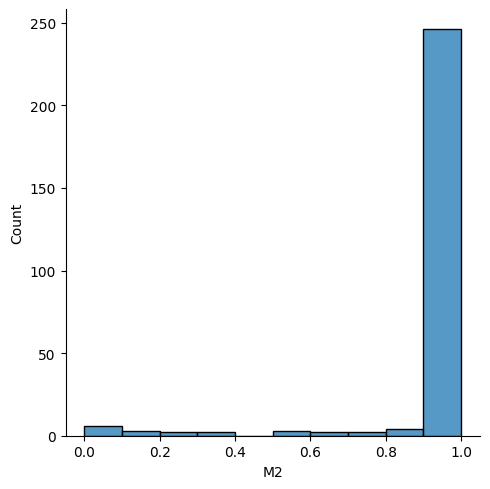

In [4]:
sns.displot(data=df_all_results, x='M2', bins=10)